# <p style="text-align: center;">Minería de Datos - PCA Primera Entrega </p>
### Alumno: Daniel Garnica Sánchez

## Introducción

<p style="text-align: justify;">
Dentro de la estadística existen diversos problemas y dificultades inherentes, de los cuales uno de los principales es la visualización de datos. Generalmente se nos muestran gráficos de relación entre dos variables, esto quiere decir que ésta información la podemos facilmente visualizar en un plano bidimensional (2D), incluso es posible representar información de relación entre tres variables en un plano tridimensional (3D), sin embargo, ¿Que sucede cuando son mas de tres variables, quizas cuatro, cinco, o treinta? Una manera de resolver el problea es con el Análisis de Componentes Principales por sus siglas PCA. </p>

### ¿Qué es PCA?

<p style="text-align: justify;">
El Análisis de Componentes Principales constituye un procedimiento matemático que permite transformar un número de variables posiblemente correlacionadas en un número menor de variables no correlacionadas, llamadas: Componentes Principales. El primer componente o eje absorbe la mayor cantidad de variabilidad posible del conjunto de datos y cada uno de los componentes restantes absorbe el resto. </p>

<p style="text-align: justify;">
Básicamente el método genera un nuevo conjunto de variables, denomiadas Componentes Principales, donde cada componente principal es una combinación lineal de las variables originales.</p>

<p style="text-align: justify;">    
PCA es un método tradicionalmente utilizado para reducir la dimensionalidad de un conjunto de datos. También se utiliza para identificar nuevas variables en un conjunto de datos para una mejor interpretación de los mismos. </p>

## Desarrollo

<p style="text-align: justify;">  
La siguiente entrega desea mostrar el proceso de reducción de dimensionalidad con el procedimiento de PCA a partir de un conjunto de datos con variables de hasta 19 <b>características</b> y una <b>clase</b> </p>

A continuación se moestrará 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [3]:
archivo = "datos.txt"

In [5]:
df = pd.read_csv(archivo, names = ['A0','A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12','A13','A14','A15','A16','A17','A18', 'Clase'])

In [6]:
df

,A0,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A17,A18,Clase
0,140,125,0,0.000000,0.000000,0.277778,0.062963,0.666667,0.311111,6.185185,7.333334,7.666666,3.555556,3.444444,4.444445,-7.888889,7.777778,0.545635,-1.121818,0
1,188,133,0,0.000000,0.000000,0.333333,0.266667,0.500000,0.077778,6.666666,8.333334,7.777778,3.888889,5.000000,3.333333,-8.333333,8.444445,0.538580,-0.924817,0
2,105,139,0,0.000000,0.000000,0.277778,0.107407,0.833333,0.522222,6.111111,7.555555,7.222222,3.555556,4.333334,3.333333,-7.666666,7.555555,0.532628,-0.965946,0
3,34,137,0,0.000000,0.000000,0.500000,0.166667,1.111111,0.474074,5.851852,7.777778,6.444445,3.333333,5.777778,1.777778,-7.555555,7.777778,0.573633,-0.744272,0
4,39,111,0,0.000000,0.000000,0.722222,0.374074,0.888889,0.429629,6.037037,7.000000,7.666666,3.444444,2.888889,4.888889,-7.777778,7.888889,0.562919,-1.175773,0
5,16,128,0,0.000000,0.000000,0.500000,0.077778,0.666667,0.311111,5.555555,6.888889,6.666666,3.111111,4.000000,3.333333,-7.333334,7.111111,0.561508,-0.985811,0
6,26,67,0,0.111111,0.000000,1.000000,0.888890,2.444445,3.185185,20.000000,19.555555,25.888890,14.555555,-1.333333,17.666666,-16.333334,25.888890,0.436939,-1.623202,0
7,14,110,0,0.000000,0.000000,1.722222,5.351850,2.666667,1.022223,17.925926,18.888890,21.444445,13.444445,2.888889,10.555555,-13.444445,21.444445,0.368848,-1.345096,0
8,11,108,0,0.000000,0.000000,1.333333,0.800000,1.388889,0.951852,17.666666,19.000000,21.111110,12.888889,4.000000,10.333333,-14.333333,21.111110,0.388756,-1.302133,0
9,85,101,0,0.000000,0.000000,1.333333,1.288888,1.277778,1.218518,21.296297,21.222221,26.777779,15.888889,-0.222222,16.444445,-16.222221,26.777779,0.404792,-1.558599,0


In [9]:
caracteristicas = ['A0','A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12','A13','A14','A15','A16','A17','A18']
x = df.loc[:,caracteristicas].values

In [11]:
y = df.loc[:,['Clase']].values

In [13]:
x = StandardScaler().fit_transform(x)

In [15]:
pd.DataFrame(data = x, columns = caracteristicas).head()

,A0,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A17,A18
0,-0.058049,-0.285629,0.0,-0.338097,-0.199868,-0.621918,-0.110554,-0.463761,-0.090389,-0.784836,-0.693751,-0.796105,-0.848481,1.511535,-0.712136,-0.070207,-0.849913,0.757935,-0.001032
1,0.598297,-0.153891,0.0,-0.338097,-0.199868,-0.598559,-0.103935,-0.509463,-0.093776,-0.769504,-0.659068,-0.793056,-0.837138,1.680258,-0.772656,-0.106443,-0.831181,0.724362,0.119387
2,-0.536634,-0.055087,0.0,-0.338097,-0.199868,-0.621918,-0.109110,-0.418060,-0.087325,-0.787194,-0.686044,-0.808304,-0.848481,1.607948,-0.772656,-0.052089,-0.856157,0.696035,0.094247
3,-1.507478,-0.088021,0.0,-0.338097,-0.199868,-0.528480,-0.107184,-0.341891,-0.088024,-0.795450,-0.678336,-0.829651,-0.856043,1.764620,-0.857382,-0.043030,-0.849913,0.891177,0.229748
4,-1.439109,-0.516170,0.0,-0.338097,-0.199868,-0.435042,-0.100444,-0.402826,-0.088669,-0.789553,-0.705312,-0.796105,-0.852262,1.451277,-0.687929,-0.061148,-0.846791,0.840188,-0.034012


In [17]:
pca = PCA(n_components = 2)

In [19]:
componentesPrincipales = pca.fit_transform(x)

In [23]:
principalDf = pd.DataFrame(data = componentesPrincipales, columns = ['PC1', 'PC2'])

In [25]:
principalDf.head(5)

,PC1,PC2
0,-2.299677,-0.343837
1,-2.371925,-0.403867
2,-2.389590,-0.266572
3,-2.514506,-0.096834
4,-2.236746,-0.124341


In [27]:
df[['Clase']].head()

,Clase
0,0
1,0
2,0
3,0
4,0


In [29]:
finalDf = pd.concat([principalDf, df[['Clase']]], axis = 1)
finalDf.head(5)

,PC1,PC2,Clase
0,-2.299677,-0.343837,0
1,-2.371925,-0.403867,0
2,-2.389590,-0.266572,0
3,-2.514506,-0.096834,0
4,-2.236746,-0.124341,0


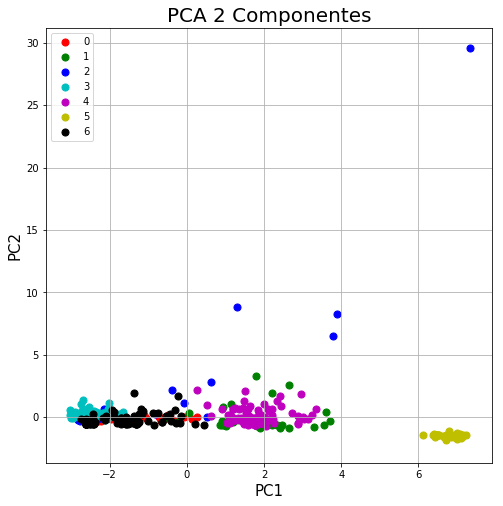

In [31]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('PCA 2 Componentes', fontsize = 20)


clases = [0,1,2,3,4,5,6,7]
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
for clase, color in zip(clases,colors):
    indicesToKeep = finalDf['Clase'] == clase
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(clases)
ax.grid()